In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import pandas as pd


In [16]:
WS=pd.read_csv("Salary.csv")
data=np.array(WS)
np.set_printoptions(suppress=True)
data


array([[     1.1,  39343. ],
       [     1.3,  46205. ],
       [     1.5,  37731. ],
       [     2. ,  43525. ],
       [     2.2,  39891. ],
       [     2.9,  56642. ],
       [     3. ,  60150. ],
       [     3.2,  54445. ],
       [     3.2,  64445. ],
       [     3.7,  57189. ],
       [     3.9,  63218. ],
       [     4. ,  55794. ],
       [     4. ,  56957. ],
       [     4.1,  57081. ],
       [     4.5,  61111. ],
       [     4.9,  67938. ],
       [     5.1,  66029. ],
       [     5.3,  83088. ],
       [     5.9,  81363. ],
       [     6. ,  93940. ],
       [     6.8,  91738. ],
       [     7.1,  98273. ],
       [     7.9, 101302. ],
       [     8.2, 113812. ],
       [     8.7, 109431. ],
       [     9. , 105582. ],
       [     9.5, 116969. ],
       [     9.6, 112635. ],
       [    10.3, 122391. ],
       [    10.5, 121872. ],
       [    11.2, 127345. ],
       [    11.5, 126756. ],
       [    12.3, 128765. ],
       [    12.9, 135675. ],
       [    13

In [17]:
data.shape[0]
m=data.shape[0]
n=data.shape[1]-1


X=np.empty(shape=[m,n+1])
for i in range(0,m):
    for j in range(0,n+1):
        if(j==0):
            X[i][j]=1
        else:
            X[i][j]=data[i][j-1]
X
y=np.empty(shape=[m,1])

for i in range(0,m):
    
    y[i][0]=data[i][n]/10000

theta = np.empty(shape=[n+1, 1])
theta[0][0] = 0
theta[1][0] = y[0][0]

def hypothese(x):
    return np.dot(theta.T,x)


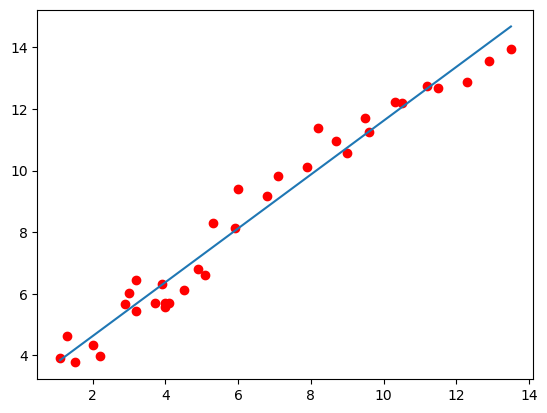

In [18]:
def computeCost(factor): 
 temp=np.dot(X,factor)-y
 temp=np.dot(temp.T,temp)
 return (1/(2*m))*np.sum(temp)

def normal():
    global theta
    theta=np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,y))
normal()
res=np.dot(X,theta)
plt.plot()
plt.plot(X[:,1],y.T[0], 'ro')
plt.plot(X[:,1],res.T[0])
plt.show()


 


In [19]:
theta[0][0] = 0
theta[1][0] = y[0][0]
def diff(j):
 temp=np.dot(X,theta)-y
 t=X[:,j]
 t=t.reshape(m,1)
 return np.dot(temp.T,t)[0]
def differentiate(j):
    sum=0
    for i in range(0,m):
        sum+=(np.dot(theta.T,X[i,:])[0]-y[i][0])*X[i][j]
    return sum

    


In [20]:
var="test output"
print(var[::-7])

tt


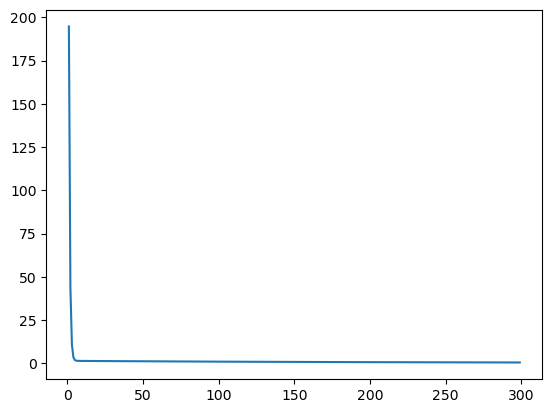

In [21]:
alfa=0.01
cost=[]

def grad():
    for i in range(1,300):
     cost.append(computeCost(theta))
     temp=[]
     for j in range(0,n+1):
         temp.append(theta[j][0]-((alfa/m)*differentiate(j)))
     for j in range(0,n+1):
         theta[j][0]=temp[j]
grad()
iterations=range(1,300)
plt.plot(iterations,cost)
# res = np.dot(X, theta)
# plt.plot()
# plt.plot(X[:, 1], y.T[0], 'ro')
# plt.plot(X[:, 1], res.T[0])
# plt.show()
# print(theta)


In [27]:
theta

array([[1.31585322],
       [1.06265798]])

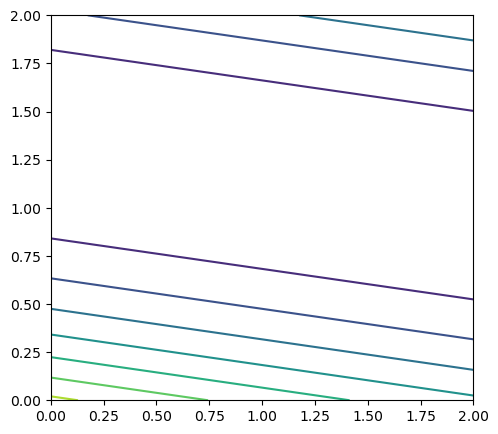

In [9]:
o0=np.linspace(0,2,100)
o1=np.linspace(0,2,100)
J=np.zeros((o0.shape[0],o1.shape[0]))
for i in range(0,o0.shape[0]):
    for j in range(0,o1.shape[0]) :
        t=np.array([o0[i],o1[j]]).T
        J[i][j]=computeCost(t)

fig=plt.figure(figsize=(12,5))
# ax=plt.axes(projection='3d')

# ax.plot_surface(o0,o1,J.T,cmap='viridis')
ax=fig.add_subplot(122)
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

plt.contour(o0, o1, J.T, cmap='viridis')


